In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import rdBase
from rdkit import Chem
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Import data, keep only 310K random molecules
data = pd.read_csv("../exp4/cldr.smi", header = None, sep = ' ', names = ['smiles','zid'])
data = data.sample(n = 320000, random_state = 123)
data.head()

,smiles,zid
3636620,C[NH2+]CC(=O)Nc1ccc(cc1F)Cl,ZINC34979665
8319688,CO[C@H]1CCCC[C@H]1NC(=O)N2CCCC[C@@H]2CN3CCCC3=O,ZINC80485826
6889087,CCc1cc(nc(n1)Nc2c(cccc2F)F)OCC(=O)[O-],ZINC73701994
7405201,C[C@H](C(=O)Nc1cccc(c1)NCc2cc3ccccc3[nH]c2=O)OC,ZINC76867526
8860374,Cc1ccccc1NC(=O)N[C@@](C)(CO)C2CC2,ZINC84868489


In [3]:
n = data.shape[0]
corr_smi_yn = [x != None for x in [Chem.MolFromSmiles(s) for s in data.smiles]]
data = data[corr_smi_yn]
data = data[1:310000]

In [4]:
# Add descriptor columns and use nonisomeric SMILES
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)
data['tpsa'] = data['mol'].apply(Descriptors.TPSA)
data['mr'] = data['mol'].apply(Descriptors.MolMR)
data['lasa'] = data['mol'].apply(Descriptors.LabuteASA)

In [10]:
data[["smi","tpsa","mr","lasa"]].to_csv("./exp5set.csv", index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff730f3ffd0>,
      dtype=object)

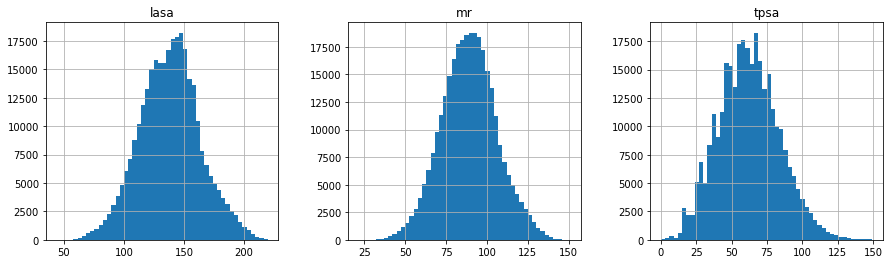

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data[["tpsa","mr","lasa"]].hist(bins = 50, layout = (1,3), figsize = (15,4))

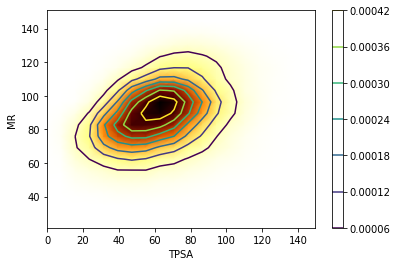

In [7]:
y = data[["tpsa","mr"]]
mf.bidiplot(np.asarray(y), "TPSA","MR", d = True)

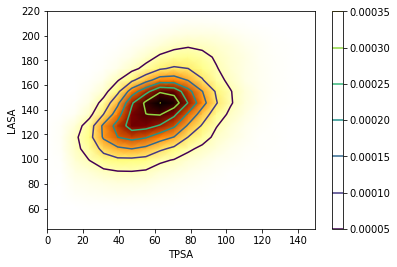

In [8]:
y = data[["tpsa","lasa"]]
mf.bidiplot(np.asarray(y), "TPSA","LASA", d = True)

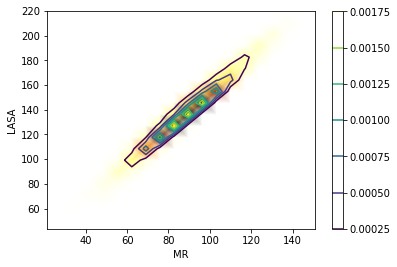

In [9]:
y = data[["mr","lasa"]]
mf.bidiplot(np.asarray(y), "MR","LASA", d = True)